# COURSE: A deep understanding of deep learning
## SECTION: Weight inits and investigations
### LECTURE: CodeChallenge: Identically random weights
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202212

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import copy

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/f2/gq8xgm9x491cqwtct_tgpy0h0000gn/T/ipykernel_61546/1009634590.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# create a model
net = nn.Sequential(
    nn.Linear(2,8),  # input layer
    nn.Linear(8,1),  # hidden layer
    nn.Linear(1,1),  # output unit
   )

# Create the four networks

In [3]:
### NO RANDOM SEED

# create a "template" network
net_noseed = copy.deepcopy( net )

# update the weights
for p in net_noseed.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [4]:
### RANDOM SEED 1a

# create a "template" network
net_rs1a = copy.deepcopy( net )

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1a.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [5]:
### RANDOM SEED 2

# create a "template" network
net_rs2 = copy.deepcopy( net )

# set the seed to 2
torch.manual_seed(2)

# update the weights
for p in net_rs2.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [6]:
### RANDOM SEED 1b

# create a "template" network
net_rs1b = copy.deepcopy( net )

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1b.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

# Extract all weights from all networks

In [7]:
# initialize empty arrays
w_ns = np.array([])
w_1a = np.array([])
w_2  = np.array([])
w_1b = np.array([])

# loop over layers in the models
for i in range(3):

  # extract the vectorized weights matrices
  w_ns = np.append(w_ns,net_noseed[i].weight.view(-1).detach().numpy())
  w_1a = np.append(w_1a,  net_rs1a[i].weight.view(-1).detach().numpy())
  w_2  = np.append(w_2 ,   net_rs2[i].weight.view(-1).detach().numpy())
  w_1b = np.append(w_1b,  net_rs1b[i].weight.view(-1).detach().numpy())

# check the vector
w_ns

array([ 0.39734468, -0.0098195 ,  0.60569805,  0.19350243,  0.12868182,
        0.07562882,  0.09023569, -0.41835514, -0.66704649,  0.57383114,
        0.54994941,  0.00925411,  0.56986064,  0.46549624, -0.65758961,
       -0.0945426 , -0.36222804, -0.08423114, -0.14056247, -0.22683065,
       -0.3812196 ,  0.44161251,  0.06091061,  0.21173115,  0.06971978])

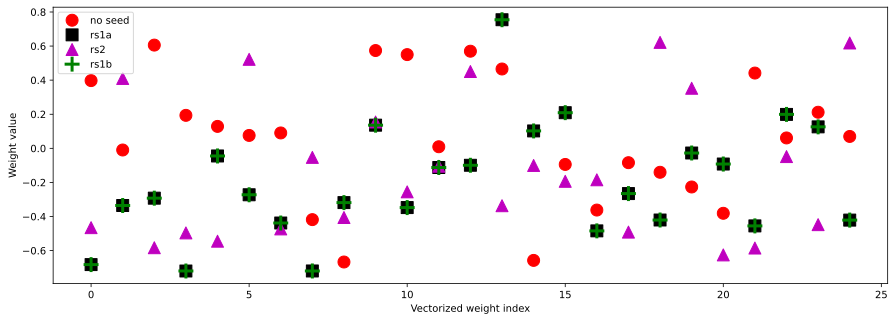

In [8]:
# plotting

fig = plt.figure(figsize=(15,5))

plt.plot(w_ns,'ro',markersize=12,label='no seed')
plt.plot(w_1a,'ks',markersize=12,label='rs1a')
plt.plot(w_2 ,'m^',markersize=12,label='rs2')
plt.plot(w_1b,'g+',markersize=15,label='rs1b',markeredgewidth=3)
plt.legend()
plt.xlabel('Vectorized weight index')
plt.ylabel('Weight value')

plt.show()

In [9]:
# the algebraic test

print('1a-1b should be zeros:')
print( w_1a-w_1b )
print('\n\n')

print('1a-2 should be non-zeros:')
print( w_1a-w_2 )
print('\n\n')

print('1a-ns should be non-zeros:')
print( w_1a-w_ns )
print('\n\n')

1a-1b should be zeros:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]



1a-2 should be non-zeros:
[-0.21680683 -0.74543169  0.29078263 -0.22352028  0.50025795 -0.79460078
  0.03471264 -0.66646316  0.08751759 -0.01855947 -0.09211737 -0.00731025
 -0.55001728  1.09119886  0.20277754  0.40263602 -0.29967313  0.22609788
 -1.04223195 -0.37989978  0.53314489  0.12994796  0.2475912   0.57373706
 -1.03930008]



1a-ns should be non-zeros:
[-1.07961193 -0.32569436 -0.89816719 -0.91328597 -0.17347795 -0.3480664
 -0.52840317 -0.3012546   0.34856573 -0.43800254 -0.89757493 -0.12170814
 -0.66926302  0.28900379  0.75974446  0.30367555 -0.12219128 -0.18119448
 -0.28006729  0.19937125  0.2890555  -0.89681765  0.13821789 -0.08571671
 -0.49091493]





# Additional explorations

In [ ]:
# 1) The code here only fixed the *weights*, not the biases. Does that mean that net_rs1a and net_rs1b are actually
#    DIFFERENT networks??
# 
# 2) Change the code to plot/subtract the biases instead of the weights. Are the results what you expected? If not,
#    figure out why!
# 